기본적인 `인공 신경망(ANN)`을 이용한 MNIST 숫자 분류 모델

In [1]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# PyTorch에서 이미지는 0-1로 구성되어 있고, 채널-높이-너비 순서(C H W)로 구성
# 일반적인 이미지는 0-255 값으로 구성, 높이-너비-채널 순서(H W C)로 구성
# transform.ToTensor()의 역할은 이미지의 데이터 순서를 
# PyTorch에 맞게 변환해주는 것

In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)
# drop_last=True면 data를 batch_size만큼 잘라서 불러올 때, 
# 뒤에 남는 데이터를 사용하지 않음

In [6]:
# MNIST data image of shape 28 * 28 = 784
# output은 숫자가 10개이므로 label 10개
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

# 💡 criterion의 역할
# ✔ 예측값(로짓)과 실제값을 비교하여 "얼마나 틀렸는지" 계산
# ✔ 경사 하강법(Gradient Descent)에서 손실을 최소화하도록 모델 학습 유도
# ✔ 다중 클래스 분류 문제에서 가장 많이 사용되는 손실 함수

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is NOT one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        # X 는 입력 MNIST 이미지, Y는 label(0~9)
        # X는 원래 (batch_size * 1 * 28 * 28) 사이즈인데 view를 통해 
        # (batch_size * 784) 사이즈로 변환한다. 
        # -1을 사용하면 자동으로 적절한 차원을 계산

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307106912
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526860
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning finished


### 테스트

Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


c:\Users\unbes\OneDrive\invest\Codes\.venv\Lib\site-packages\torchvision\datasets\mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\unbes\OneDrive\invest\Codes\.venv\Lib\site-packages\torchvision\datasets\mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


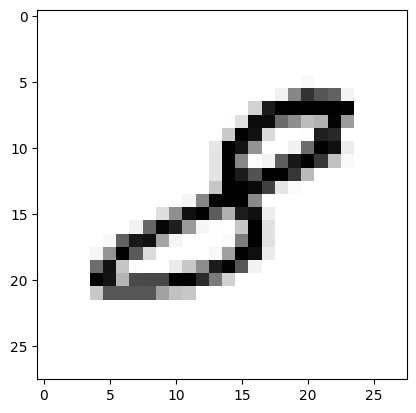

In [9]:
# Test the model using test sets
# no_grad(): 테스트 단계에서는 기울기(gradient) 계산 비활성화(메모리 절약)
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict (Visualization)
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data) # 예측 수행
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()